<a href="https://colab.research.google.com/github/salarbalou/Fredholm-Integral-of-Second-Kind/blob/main/publication_outline_finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [101]:
baseurl = 'https://scholar.google.com/scholar?as_ylo='
#for number of review papers use: 
char_rev = '&hl=en&as_sdt=0,36&as_rr=1'
#for all publications use: 
char_all = '&hl=en&as_sdt=0,36'

In [102]:
# Year of Publication, and keyword with quotation marks
keys = '"carbon+nanomaterials"'

In [103]:
years = ['2017', '2018', '2019', '2020', '2021','2022']
nump = []
for year in years:
 wd.get(baseurl+year+'&q='+keys+char_rev)
 content = wd.page_source
 soup = BeautifulSoup(content)
 pubn = soup.findAll('div', {'class':'gs_ab_mdw'})[1].text
 n = re.compile(r'^About+\s([0-9,]+)+\s+results+\s+', re.MULTILINE)
 res = n.findall(pubn); newi = [i.split(',') for i in res]
 base = len(newi[0])
 if (base == 2):
   npub = newi[0][0]+newi[0][1]
 elif (base == 1):
   npub = newi[0][0]
 nump.append(int(npub))
 eachyear = [nump[i] - nump[i+1] for i in range(len(nump)-1)]
 eachyear.append(nump[-1])

In [104]:
baseurl+keys+char_all+year+char2+year

'https://scholar.google.com/scholar?as_ylo="carbon+nanomaterials"&hl=en&as_sdt=0,362022&as_yhi=2022'

   Number of Publications    Year
0                    8880  2017.0
1                    8030  2018.0
2                    7010  2019.0
3                    5690  2020.0
4                    3850  2021.0
5                     952  2022.0
AxesSubplot(0.125,0.125;0.775x0.755)


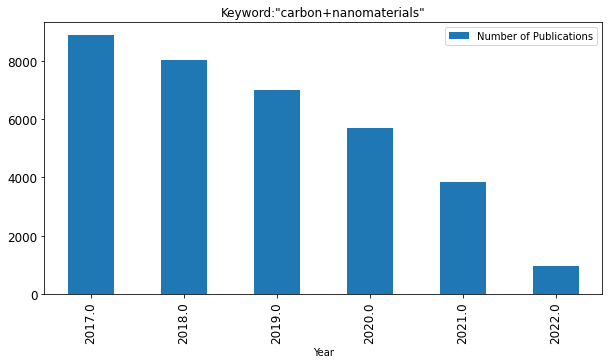

In [105]:
df = pd.DataFrame({'Number of Publications' : nump, 'Year': np.linspace(2017, 2022, 6)})
ax = df.plot(kind = 'bar', x = 'Year', y = 'Number of Publications', figsize = (10, 5), title = f'Keyword:{keys}', fontsize = 12)
print(df)
print(ax)